# PET Preprocessing Notebook

In [1]:
from notebook_utils import *

In [3]:
import os, glob

import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk

from pathlib import Path

# Histogram and Statistics Visualization

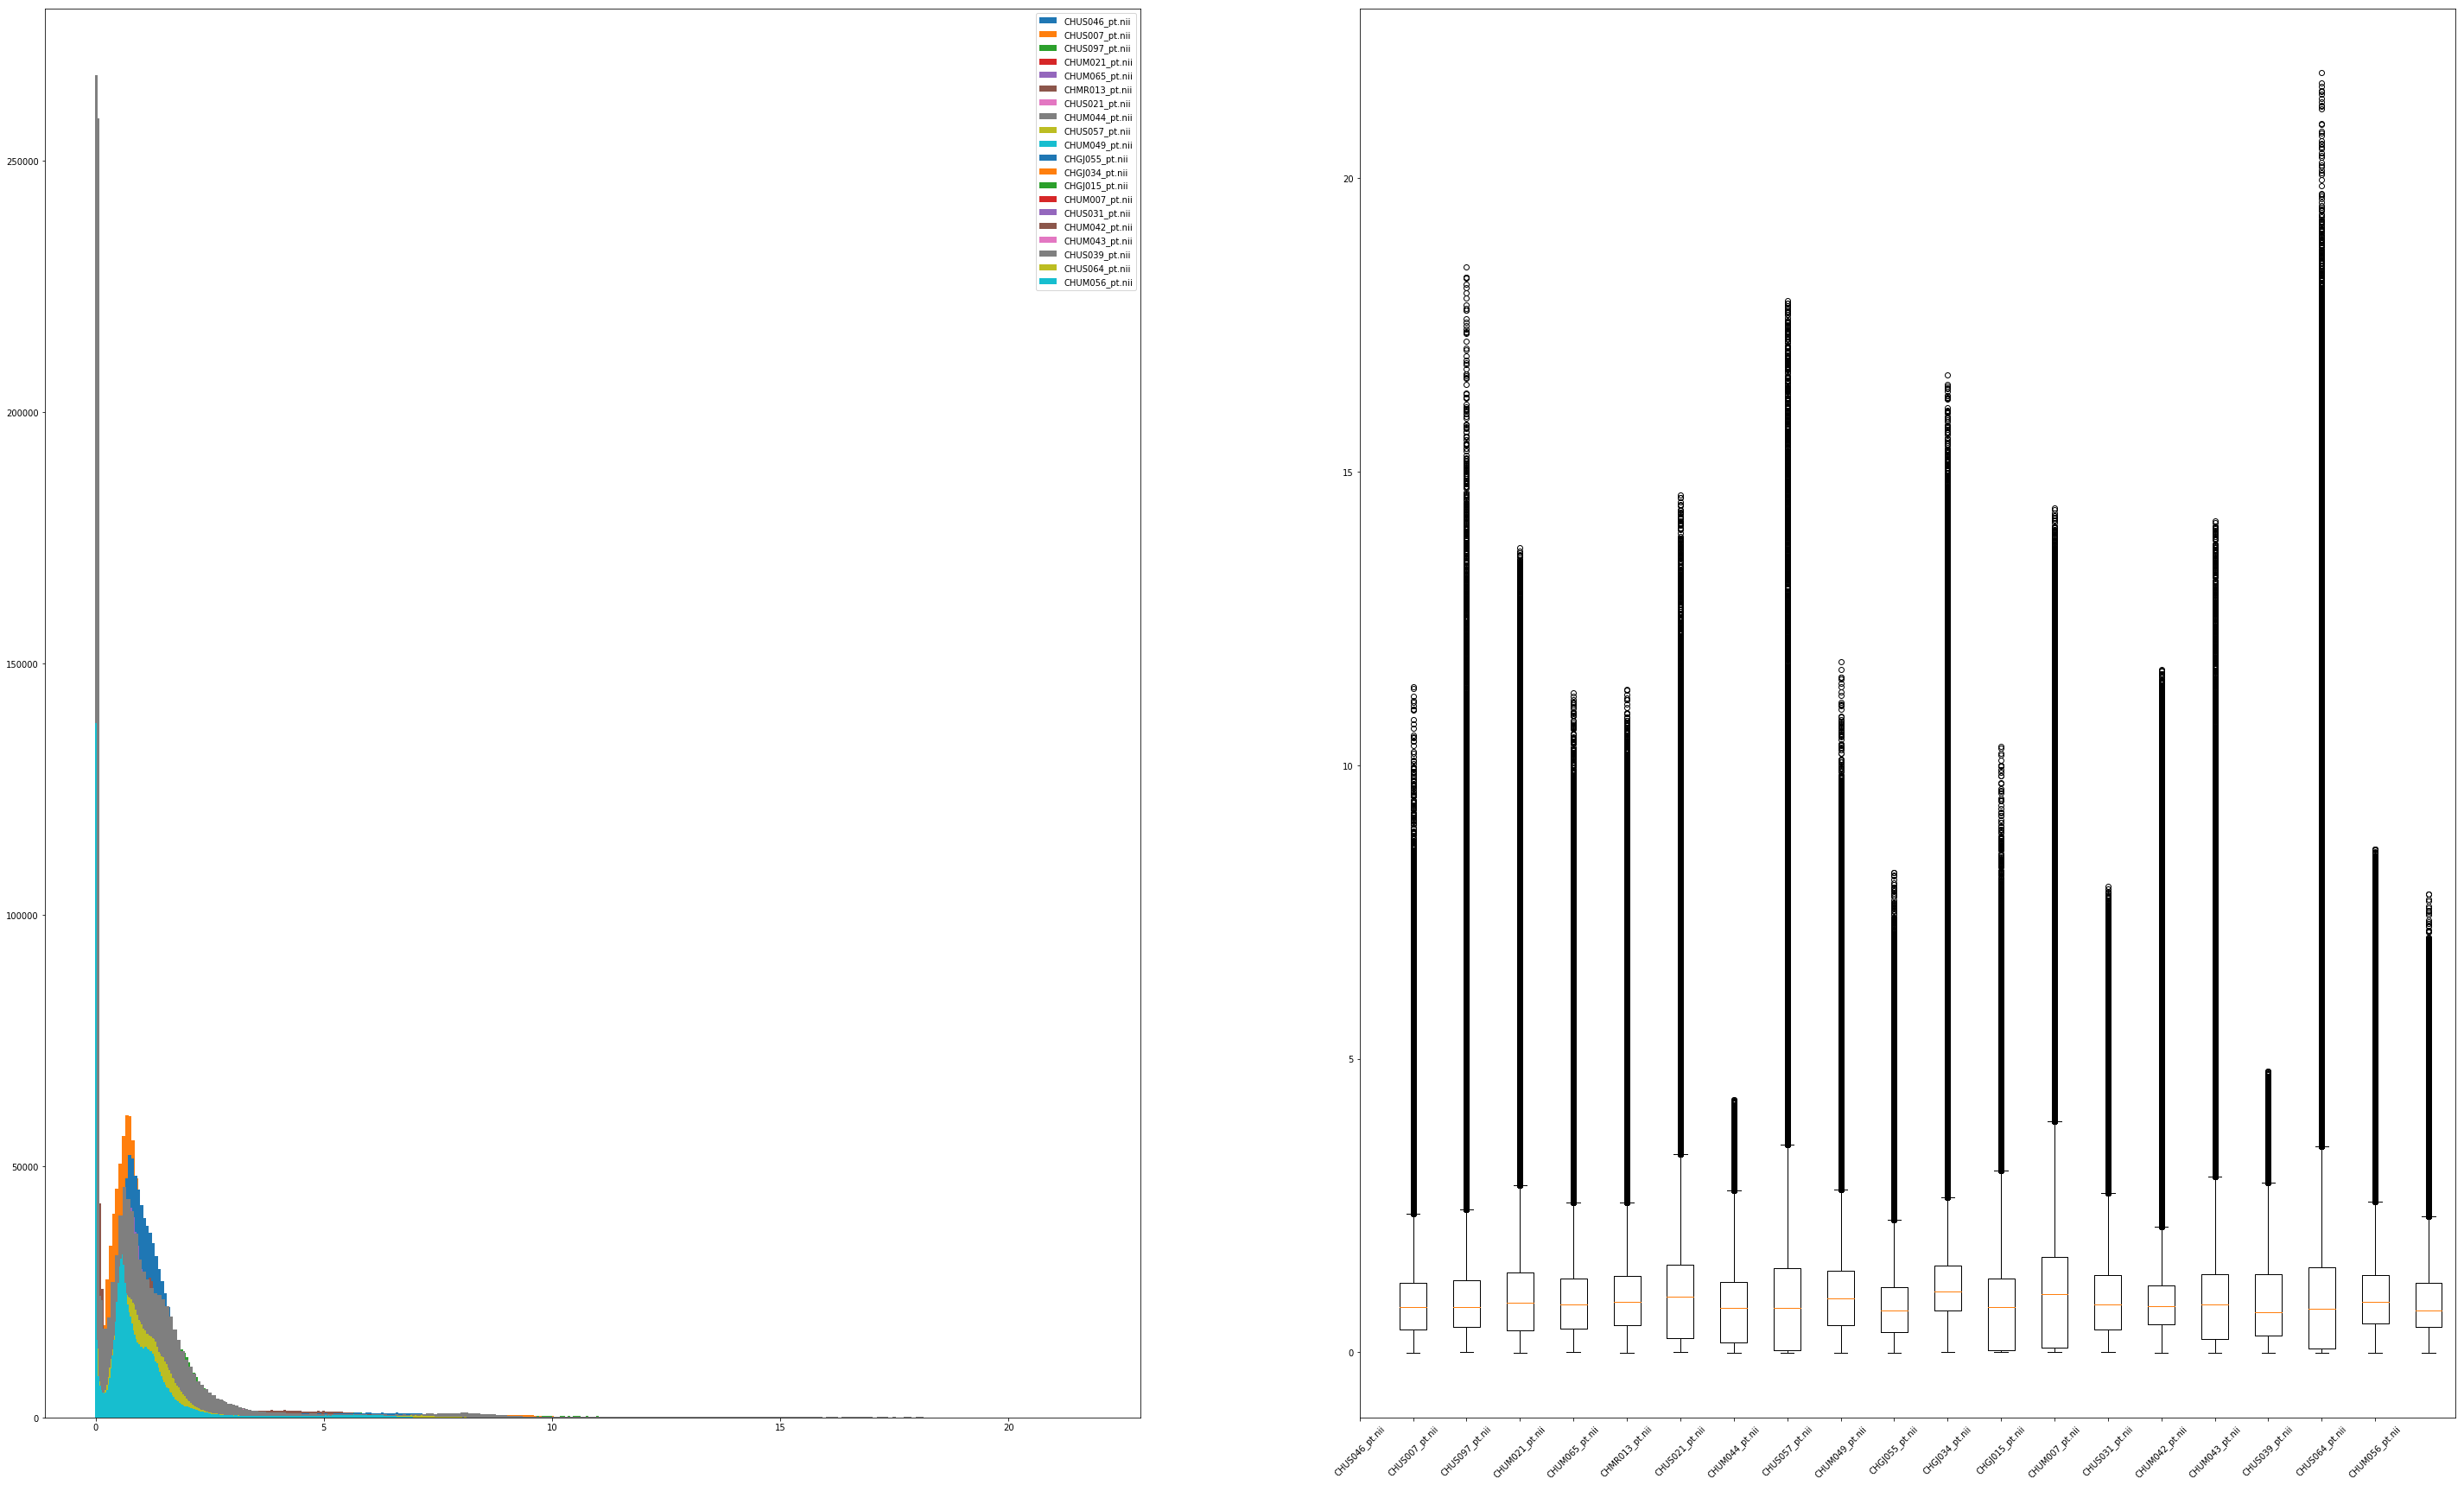

In [33]:
PET_dict = {"array": [], "label": []}
f, ax = plt.subplots(1, 2, figsize=(50, 30))

for fn in Path("/work/vq218944/HECKTOR/hecktor_train/val").rglob("*_pt.nii.gz"):
    
    # Get image from filename, read array and flatten
    sitk_image_PET = read_nifti(str(fn), print_info=False)
    array_PET = sitk.GetArrayFromImage(sitk_image_PET)
    array_PET = array_PET.flatten()
    
    # Get patient name from filename
    patient_name= fn.stem
    
    # Append array and filename for boxplot
    PET_dict["array"].append(array_PET)
    PET_dict["label"].append(patient_name)
    
    # Histogram for each PET array, overlayed later
    ax[0].hist(array_PET, bins=256, label=patient_name)
    
# Draw Boxplots to show min-max values
ax[1].boxplot(PET_dict["array"])

ax[1].set_xticks(range(len(PET_dict["label"])))
ax[1].set_xticklabels(PET_dict["label"], rotation=45)
                 
ax[0].legend(loc='upper right')    
plt.show()